In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data
print("Loading the data ...\n\n")
images = np.load("cropped_images.npy")
images_gt = np.load("cropped_images_gt.npy")
patient_ids = np.load("patient_ids.npy")

print("Image data has size: {}".format(images.shape))
print("Ground truth has size: {}".format(images_gt.shape))

print("Patient ids array has size: {}\n\n".format(patient_ids.shape))

Loading the data ...


Image data has size: (1902, 128, 128)
Ground truth has size: (1902, 128, 128)
Patient ids array has size: (1902,)




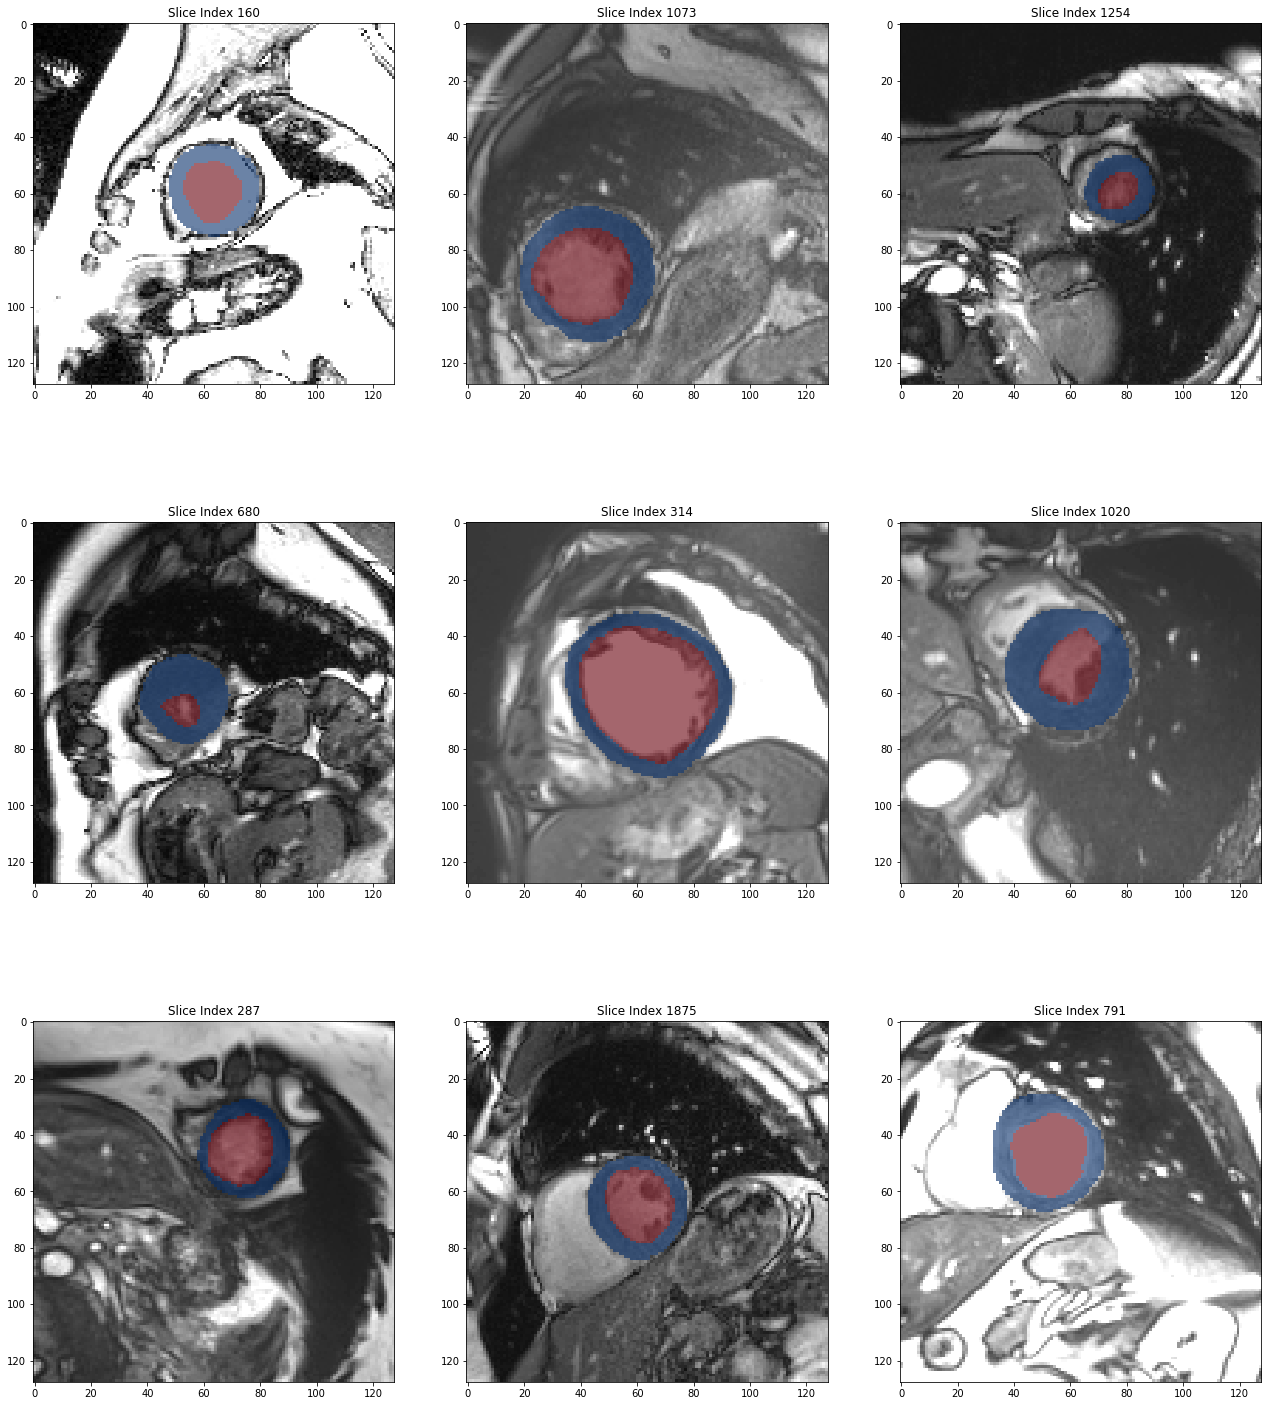

In [3]:
plt.rcParams["figure.figsize"] = (22, 26) # (w, h)

n_rows = 3
n_cols = 3

for z in range(9):
  random_index = np.random.randint(0, images.shape[0])
  plt.subplot(n_rows, n_cols, 1 + z)
  plt.imshow(images[random_index, :, :], clim=(0, 150), cmap='gray')
  plt.imshow(np.ma.masked_where(images_gt[random_index, :, :]!=2, images_gt[random_index, :, :]==2), alpha=0.6, cmap='Blues', clim=(0, 1))  
  plt.imshow(np.ma.masked_where(images_gt[random_index, :, :]!=3, images_gt[random_index, :, :]==3), alpha=0.6, cmap='Reds', clim=(0, 1))
  plt.title('Slice Index {}'.format(random_index))
plt.show()

In [4]:
np.count_nonzero(images_gt==3)

1298006

In [5]:
import os
import SimpleITK as sitk

root = './Data/'
#uncropped_gt = np.array([])
list_uncropped = []
counter = 0
for subdir in os.listdir(root):
    for filename in os.listdir(root + subdir):
        if 'frame' in filename:
            if 'gt' in filename:
                # Read image and convert to numpy array
                filepath = '/'.join([root, subdir, filename])
                im = sitk.ReadImage(filepath)
                im_array = sitk.GetArrayFromImage(im)
                
                list_uncropped.append(im_array)
                if(counter%50==0):
                    print(counter)
                counter+=1
                # Store the cropped image array in new array along z axis (axis=0)
                #uncropped_gt = np.append(uncropped_gt, im_array.ravel())

0
50
100
150


In [22]:
#np.count_nonzero(uncropped_gt==3)

1298528

In [12]:
lv_pixels_uncropped = []
for img_3d in list_uncropped:
    for z in range(img_3d.shape[0]):
        lv_pixels_uncropped.append(np.count_nonzero(img_3d[z, :, :] == 3))

In [13]:
len(lv_pixels_uncropped)

1902

In [17]:
lv_pixels_cropped = []
for z in range(images_gt.shape[0]):
    lv_pixels_cropped.append(np.count_nonzero(images_gt[z, :, :] == 3))

In [71]:
lv_pixels_uncropped = np.array(lv_pixels_uncropped)
lv_pixels_cropped = np.array(lv_pixels_cropped)

comparison = lv_pixels_uncropped - lv_pixels_cropped
print("There is difference in LV pixels in {} images.".format(np.count_nonzero(comparison)))
print("The indices (slices) of the badly cropped images are {}.".format(np.where(comparison>0)[0]))

There is difference in LV pixels in 5 images.
The indices (slices) of the badly cropped images are [715 716 717 718 719].


In [68]:
first_diff = np.where(comparison>0)[0][0]
# Find the index of different images in the uncropped list
# a bit complicated since it is a list of numpy arrays of different sizes
s = 0
img_index = 0
while(s < first_diff):
    s += list_uncropped[img_index].shape[0]
    img_index += 1
s -= list_uncropped[img_index].shape[0]
img_index = img_index - 1
z_index = first_diff - s
print(first_diff, img_index, z_index)

715 74 1


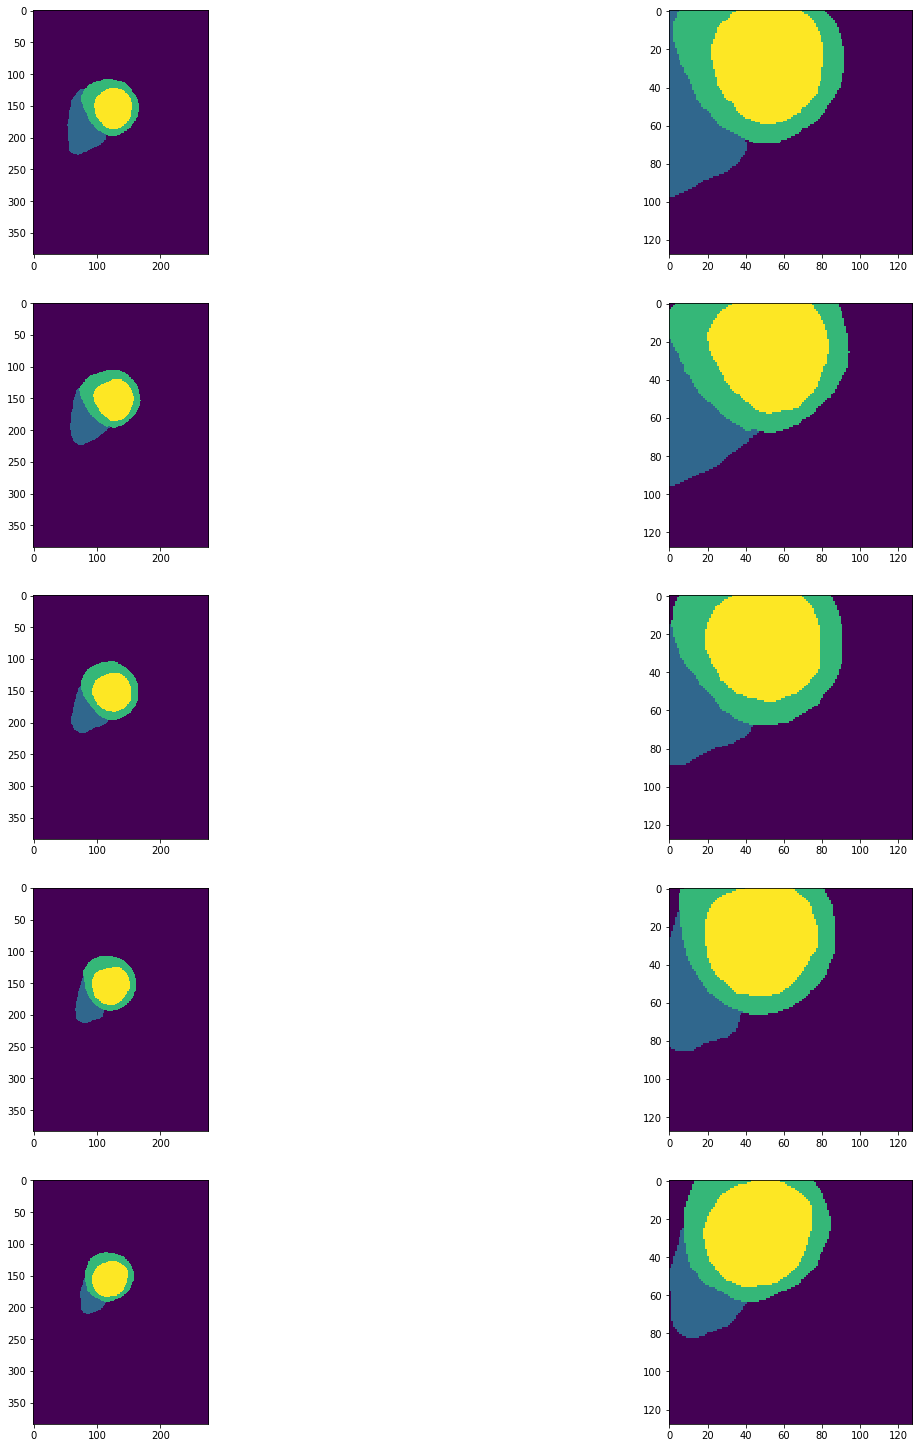

In [69]:
n_rows = 5
n_cols = 2

# At the left: uncropped images    at the right the 128x128 cropped ones
for z in range(0,10,2):
  plt.subplot(n_rows, n_cols, 1 + z)
  plt.imshow(list_uncropped[img_index][z_index, :, :])
  z_index += 1

for z in range(1,10,2):
  plt.subplot(n_rows, n_cols, 1 + z)
  plt.imshow(images_gt[first_diff, :, :])
  first_diff += 1

plt.show()

## Conclusion: 128x128 cropping goes wrong for 5 images out of 1902, because it also crops part of the LV (yellow thing). However, it seems accepta